In [3]:
# first: find regions that are plates

In [4]:
# import settings and packages
%matplotlib inline
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb
from scipy import ndimage as ndi
import glob

In [5]:
# create new class of object called cultureplate:
class cultureplate:
    def __init__ (self, name, boundaries, colonies, image, label, pos, scanner):
        self.name = name
        self.colonies = dict()
        self.boundaries = tuple()
        self.image = ()
        self.label = ()
        self.pos = ()
        self.scanner=()
    def add_colony(self, colonies, key, value):
        self.colonies[key]=value
    def rename(self, newname):
        self.name = newname
    def add_image(self, newimage):
        self.image = newimage

In [6]:
# import final scanned image
# after having imported it into the local folder
# and separate out blue channel (could alternatively use green)
plates1 = io.imread('/home/cmarx/Documents/Jessica/images/deathat4mM_170917/scanner1/scan_2017-09-24_13:01:01.tiff')

In [7]:
cultureplates_manual = list()

In [8]:
plateA = plates1[200:2900, 3700:6400,:]

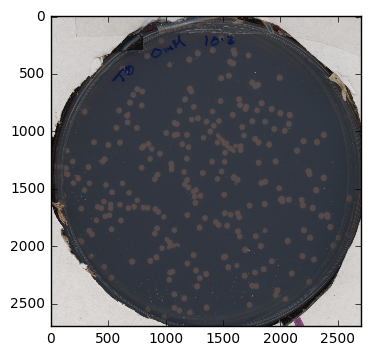

In [9]:
plt.imshow(plateA)

In [10]:
cultureplates_manual.append(cultureplate(name='T0_0mM_10-2',
                                         boundaries=(),
                                         colonies=dict(),
                                         image=(),
                                         label=(),
                                         pos=(),
                                         scanner=()))
len(cultureplates_manual)

1

In [11]:
cultureplates_manual[0].add_image(plates1[200:2900, 3700:6400,:])
cultureplates_manual[0].boundaries=(200,3700,2900,6400)
cultureplates_manual[0].pos='topright'
cultureplates_manual[0].scanner='1'

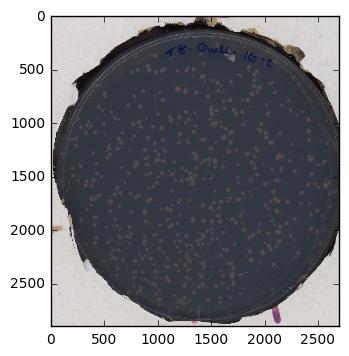

In [12]:
plateB = plates1[3200:6100, 3600:6300,:]
plt.imshow(plateB)

In [13]:
cultureplates_manual.append(cultureplate(name='T8_0mM_10-2',
                                         boundaries=(),
                                         colonies=dict(),
                                         image=(),
                                         label=(),
                                         pos=(),
                                         scanner=()))
cultureplates_manual[1].add_image(plates1[3200:6100, 3600:6300,:])
cultureplates_manual[1].boundaries=(3200,3600,6100,6300)
cultureplates_manual[1].pos='middleright'
cultureplates_manual[1].scanner='1'
len(cultureplates_manual)

2

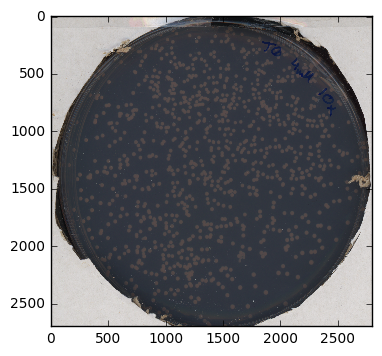

In [14]:
plateC= plates1[200:2900, 500:3300,:]
plt.imshow(plateC)

In [15]:
cultureplates_manual.append(cultureplate(name='T0_4mM_10x',
                                         boundaries=(),
                                         colonies=dict(),
                                         image=(),
                                         label=(),
                                         pos=(),
                                         scanner=()))
cultureplates_manual[2].add_image(plates1[200:2900, 500:3300,:])
cultureplates_manual[2].boundaries=(200,500,2900,3300)
cultureplates_manual[2].pos='topleft'
cultureplates_manual[2].scanner='1'
len(cultureplates_manual)

3

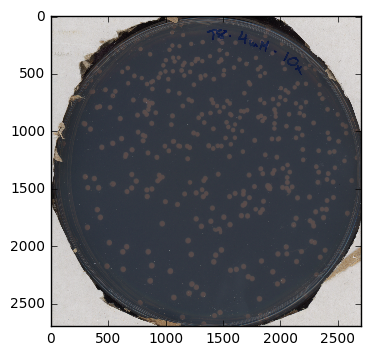

In [16]:
plateD= plates1[3300:6000, 500:3200,:]
plt.imshow(plateD)

In [17]:
cultureplates_manual.append(cultureplate(name='T8_4mM_10x',
                                         boundaries=(),
                                         colonies=dict(),
                                         image=(),
                                         label=(),
                                         pos=(),
                                         scanner=()))
cultureplates_manual[3].add_image(plates1[3300:6000, 500:3200,:])
cultureplates_manual[3].boundaries=(3300,500,6000,3200)
cultureplates_manual[3].pos='middleleft'
cultureplates_manual[3].scanner='1'
len(cultureplates_manual)

4

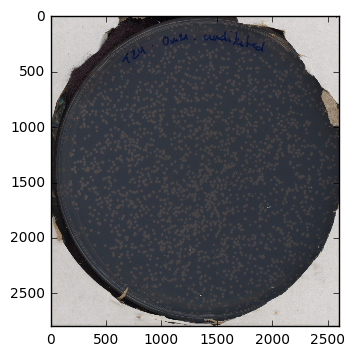

In [18]:
plateE= plates1[6400:9200, 600:3200,:]
plt.imshow(plateE)

In [19]:
cultureplates_manual.append(cultureplate(name='T24_0mM_undiluted',
                                         boundaries=(),
                                         colonies=dict(),
                                         image=(),
                                         label=(),
                                         pos=(),
                                         scanner=()))
cultureplates_manual[4].add_image(plates1[6400:9200, 600:3200,:])
cultureplates_manual[4].boundaries=(6400,600,9200,3200)
cultureplates_manual[4].pos='bottomleft'
cultureplates_manual[4].scanner='1'
len(cultureplates_manual)

5

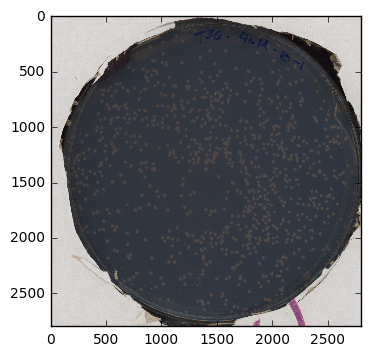

In [20]:
plateF= plates1[6400:9200, 3600:6400,:]
plt.imshow(plateF)

In [21]:
cultureplates_manual.append(cultureplate(name='T36_4mM_10-1',
                                         boundaries=(),
                                         colonies=dict(),
                                         image=(),
                                         label=(),
                                         pos=(),
                                         scanner=()))
cultureplates_manual[5].add_image(plates1[6400:9200, 3600:6400,:])
cultureplates_manual[5].pos='bottomright'
cultureplates_manual[5].scanner='1'
cultureplates_manual[5].boundaries=(6400,3600,9200,6400)
len(cultureplates_manual)

6

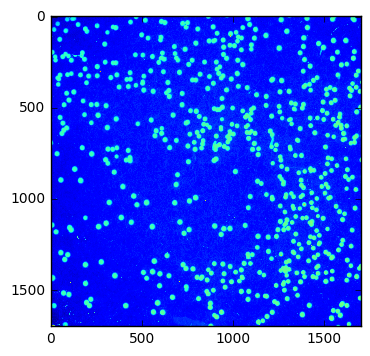

In [22]:
# now find thresholds
testplate = plateF[600:2300, 500:2200, 0]
plt.imshow(testplate)

In [23]:
thresh = threshold_otsu(testplate)

In [24]:
thresh

62

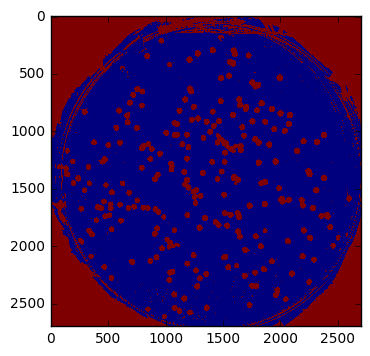

In [25]:
bw_plate1 = closing(plateA[:,:,0] > thresh, square(3))
plt.imshow(bw_plate1)

In [26]:
del plateA
del plateB
del plateC
del plateD
del plateE
del plateF

In [27]:
for platenum in range(0,6):
    bw_plate = closing(cultureplates_manual[platenum].image[:,:,0] > thresh, square(3))
    labeled_plate = label(bw_plate)
    overlaid_plate = label2rgb(labeled_plate, image=cultureplates_manual[platenum].image)  
    cultureplates_manual[platenum].label = labeled_plate # add the info about labeling
    cultureplates_manual[platenum].add_image(overlaid_plate) # add this overlay image to the object
    for region in regionprops(labeled_plate):
        if 40 < region.area < 10000:
            minr, minc, maxr, maxc = region.bbox
            if 0.6<(maxr-minr)/(maxc-minc)<1.4:
                if region.area>0.6*((maxr-minr)*(maxc-minc)):
                    cultureplates_manual[platenum].colonies[region.label] = region.coords # add only the good colonies to the dictionary

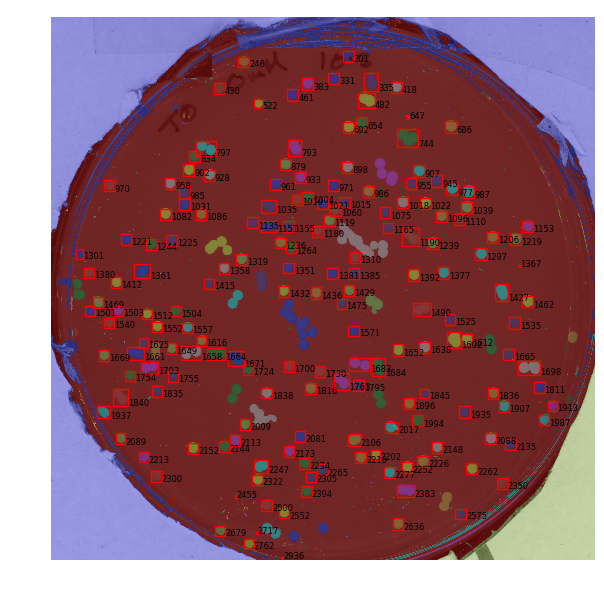

In [32]:
# find the good colonies
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(cultureplates_manual[0].image)
for region in regionprops(cultureplates_manual[0].label):
    if 40 < region.area < 10000:
        minr, minc, maxr, maxc = region.bbox
        if 0.6<(maxr-minr)/(maxc-minc)<1.4:
                if region.area>0.6*((maxr-minr)*(maxc-minc)):
                    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                      fill=False, edgecolor='red', linewidth=1)
                    ax.add_patch(rect)
                    ax.text(maxc, maxr, str(region.label), fontsize=6)
ax.set_axis_off() 
plt.tight_layout() 
plt.show()

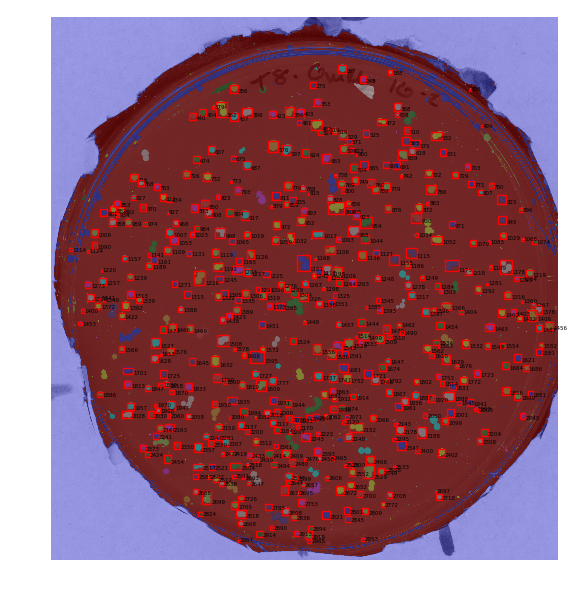

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(cultureplates_manual[1].image)
for region in regionprops(cultureplates_manual[1].label):
    if 40 < region.area < 10000:
        minr, minc, maxr, maxc = region.bbox
        if 0.6<(maxr-minr)/(maxc-minc)<1.4:
                if region.area>0.6*((maxr-minr)*(maxc-minc)):
                    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                      fill=False, edgecolor='red', linewidth=1)
                    ax.add_patch(rect)
                    ax.text(maxc, maxr, str(region.label), fontsize=4)
ax.set_axis_off() 
plt.tight_layout() 
plt.show()

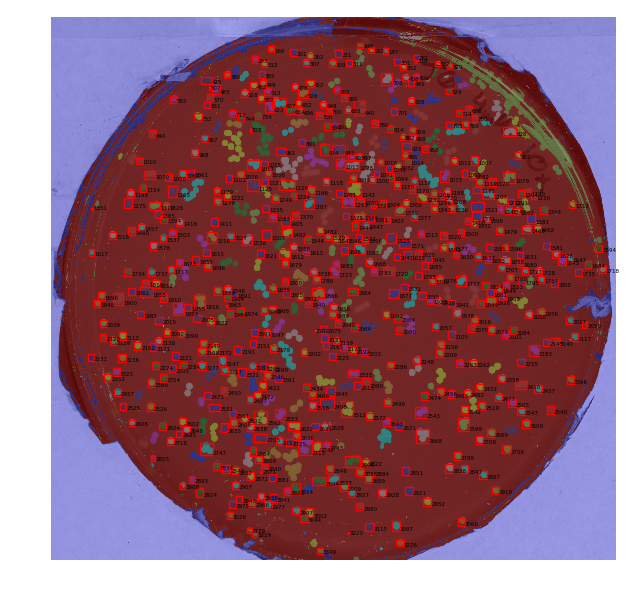

In [36]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(cultureplates_manual[2].image)
for region in regionprops(cultureplates_manual[2].label):
    if 40 < region.area < 10000:
        minr, minc, maxr, maxc = region.bbox
        if 0.6<(maxr-minr)/(maxc-minc)<1.4:
                if region.area>0.6*((maxr-minr)*(maxc-minc)):
                    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                      fill=False, edgecolor='red', linewidth=1)
                    ax.add_patch(rect)
                    ax.text(maxc, maxr, str(region.label), fontsize=4)
ax.set_axis_off() 
plt.tight_layout() 
plt.show()

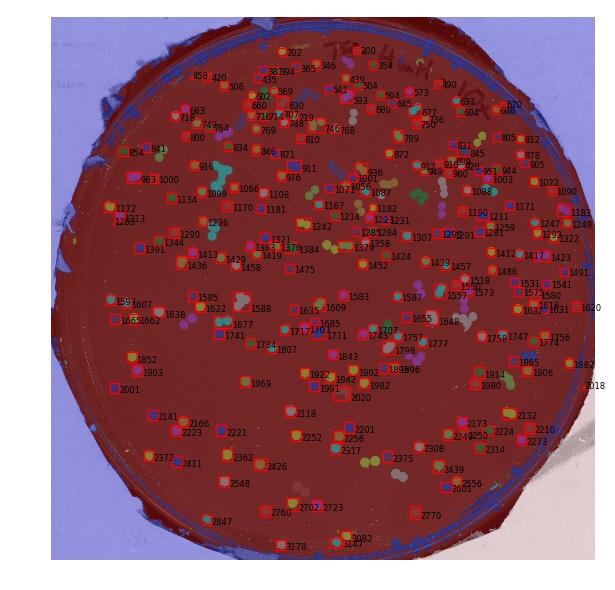

In [37]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(cultureplates_manual[3].image)
for region in regionprops(cultureplates_manual[3].label):
    if 40 < region.area < 10000:
        minr, minc, maxr, maxc = region.bbox
        if 0.6<(maxr-minr)/(maxc-minc)<1.4:
                if region.area>0.6*((maxr-minr)*(maxc-minc)):
                    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                      fill=False, edgecolor='red', linewidth=1)
                    ax.add_patch(rect)
                    ax.text(maxc, maxr, str(region.label), fontsize=6)
ax.set_axis_off() 
plt.tight_layout() 
plt.show()

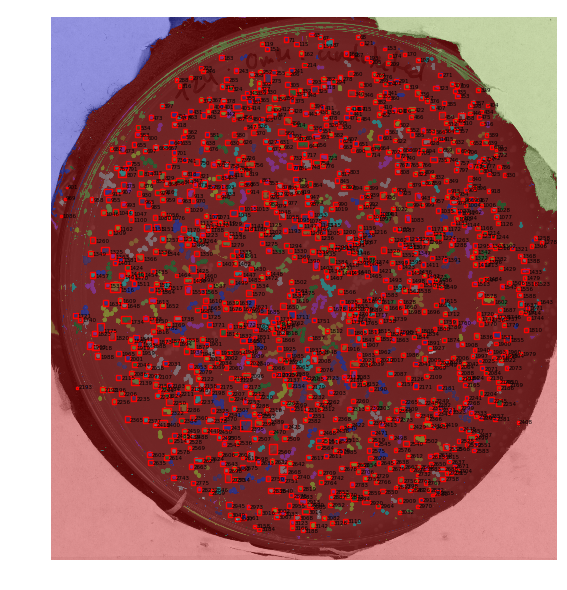

In [39]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(cultureplates_manual[4].image)
for region in regionprops(cultureplates_manual[4].label):
    if 40 < region.area < 10000:
        minr, minc, maxr, maxc = region.bbox
        if 0.6<(maxr-minr)/(maxc-minc)<1.4:
                if region.area>0.6*((maxr-minr)*(maxc-minc)):
                    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                      fill=False, edgecolor='red', linewidth=1)
                    ax.add_patch(rect)
                    ax.text(maxc, maxr, str(region.label), fontsize=4)
ax.set_axis_off() 
plt.tight_layout() 
plt.show()

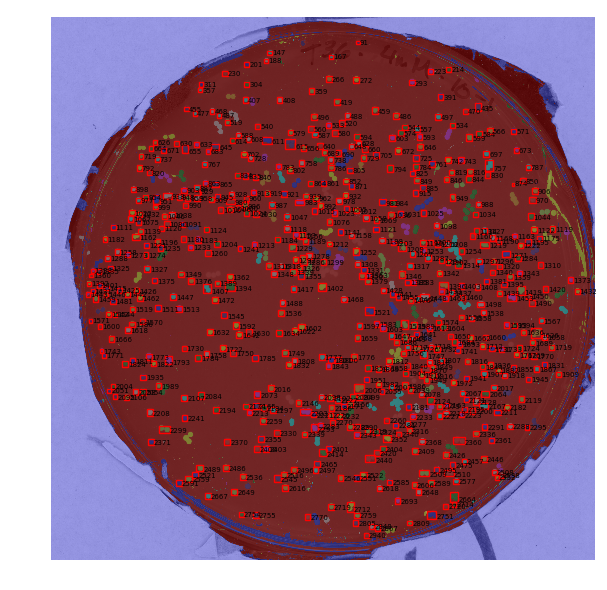

In [41]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(cultureplates_manual[5].image)
for region in regionprops(cultureplates_manual[5].label):
    if 40 < region.area < 10000:
        minr, minc, maxr, maxc = region.bbox
        if 0.6<(maxr-minr)/(maxc-minc)<1.4:
                if region.area>0.6*((maxr-minr)*(maxc-minc)):
                    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                      fill=False, edgecolor='red', linewidth=1)
                    ax.add_patch(rect)
                    ax.text(maxc, maxr, str(region.label), fontsize=5)
ax.set_axis_off() 
plt.tight_layout() 
plt.show()

In [ ]:
# now, loop through all the plates to get the timecourse data
# if you're absolutely certain the experiment is over, 
# sequester the last 3 timepoints in another folder 
# to prevent anomalous flatlines at the end of growth

In [42]:
out = open('/home/cmarx/Documents/Jessica/imageprocessing/imageprocessing_4mM_170924/scanner1_plate_IDs_170924.csv', 'w')
for eachplate in cultureplates_manual:
    out.write(str(eachplate.name)+','+str(eachplate.pos)+','+str(eachplate.scanner)+'\n')
out.close()

In [43]:
path = "/home/cmarx/Documents/Jessica/images/deathat4mM_170917/scanner1/scan_*.tiff"
out = open('/home/cmarx/Documents/Jessica/imageprocessing/imageprocessing_4mM_170924/scanner1_colony_trajectories_1700924.csv', 'w')
for eachplate in cultureplates_manual:
    topbound = eachplate.boundaries[0]
    bottombound = eachplate.boundaries[2]
    leftbound = eachplate.boundaries[1]
    rightbound = eachplate.boundaries[3]
    for filename in glob.glob(path):
        image1 = io.imread(filename)[topbound:bottombound, leftbound:rightbound,0]
        image_thresh = closing(image1 > thresh, square(3))
        colony_pixel_counts = dict()
        for colony in eachplate.colonies.keys(): 
            whitepix = 0
            for pixel in eachplate.colonies[colony]:
                x_coord=pixel[0]
                y_coord=pixel[1]
                if image_thresh[x_coord, y_coord]==True:
                    whitepix = whitepix+1
            colony_pixel_counts[colony] = (whitepix)
        for colony2 in colony_pixel_counts.keys():
            out.write(str(eachplate.name)+','
                      +str(colony2)+','
                      +str(colony_pixel_counts[colony2])+','
                      +str(filename[-24:-5])+'\n')
out.close()